In [1]:
import sys
sys.path.append('..') 
from model_architectures import *
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR
from collections import Counter
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
height, width = 10, 10
# height, width = 64, 64

C:\Users\Sai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
# Enable GPU usage for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Create the ResNet18 model
NUM_CLASSES = 96  
GRAYSCALE = True  
model = CNN(input_shape=(1, height, width), num_classes=NUM_CLASSES)
model.to(device)

CNN(
  (gaussian_noise): GaussianNoise()
  (cbrd1_1): CBRD(
    (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (cbrd1_2): CBRD(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cbrd2_1): CBRD(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (cbrd2_2): CBRD(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU

In [4]:
# Read the CSV file with specified data types
data = pd.read_csv(f"../archive/ascii_character_classification_{height}_x_{width}.csv", header=0)

label_counts = Counter(data.iloc[:, 0])
print(label_counts)

Counter({0: 50000, 51: 4886, 26: 4856, 54: 4848, 12: 4834, 58: 4833, 90: 4831, 31: 4827, 32: 4826, 62: 4825, 83: 4825, 60: 4823, 64: 4819, 56: 4819, 77: 4818, 79: 4816, 88: 4810, 80: 4806, 65: 4806, 92: 4804, 85: 4802, 20: 4800, 55: 4798, 93: 4795, 71: 4791, 45: 4789, 36: 4785, 22: 4783, 9: 4783, 34: 4782, 1: 4780, 5: 4779, 37: 4778, 33: 4777, 72: 4777, 70: 4775, 29: 4772, 40: 4770, 23: 4769, 35: 4769, 15: 4765, 69: 4764, 49: 4761, 8: 4759, 39: 4755, 73: 4746, 7: 4745, 59: 4741, 50: 4740, 4: 4740, 66: 4737, 87: 4735, 76: 4734, 44: 4731, 86: 4730, 74: 4727, 57: 4726, 28: 4724, 61: 4722, 82: 4719, 30: 4717, 21: 4714, 13: 4714, 89: 4713, 14: 4712, 10: 4699, 2: 4696, 18: 4695, 38: 4694, 81: 4693, 68: 4690, 91: 4690, 84: 4688, 3: 4688, 95: 4688, 53: 4687, 17: 4683, 16: 4682, 24: 4678, 75: 4677, 6: 4673, 46: 4665, 63: 4661, 27: 4642, 19: 4639, 43: 4631, 78: 4625, 11: 4624, 47: 4621, 41: 4619, 42: 4604, 67: 4603, 25: 4586, 48: 4584, 52: 4582, 94: 4576})


In [5]:
print(chr(12+32))

,


In [6]:
X = data.iloc[:, 1:].astype("float64")   # Features are all columns except the first one
y = data.iloc[:, 0].astype("float64")     # Labels are the first column

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
# Optionally, if you want to convert them back to pandas DataFrames:
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)


95.0
49
char value:  "


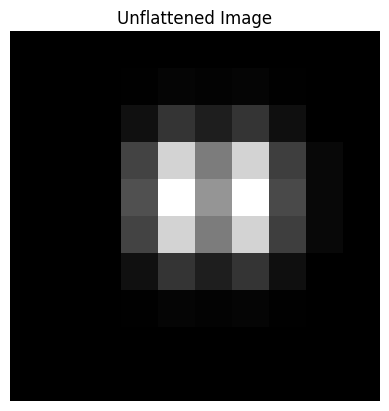

In [7]:
import matplotlib.pyplot as plt

# Find unique values in y_train
unique_values = y_train.unique()
unique_values = sorted(unique_values)

# Print unique values
print()

# Find the maximum value in y_train
max_value = y_train.max()

# Print the maximum value
print(max_value)

# Find the index where the third unique value occurs in y_train
value_to_find = unique_values[2]
idx = (y_train == value_to_find).idxmax()

# Print the index
print(idx)

# Convert the value to its corresponding character
char_value = chr(int(value_to_find)+32)
print("char value: ",char_value)

# Get the flattened array corresponding to the found index
flattened_array = X_train.iloc[idx].to_numpy()

# Reshape the array to its original dimensions
reshaped_array = flattened_array.reshape((height,width))

# Display the image using Matplotlib
plt.imshow(reshaped_array, cmap='gray')  
plt.title('Unflattened Image')
plt.axis('off')  
plt.show()


In [8]:
train_labels = train_data.iloc[:, 0].values    
train_images = train_data.iloc[:, 1:].values 

test_labels = test_data.iloc[:, 0].values 
test_images = test_data.iloc[:, 1:].values 

# Convert to PyTorch tensors
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

test_images_tensor = torch.tensor(test_images, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

In [9]:
inc = height
print(train_images_tensor.shape)
print(test_images_tensor.shape)
train_images_tensor = train_images_tensor.view(-1, 1, inc, inc)
test_images_tensor = test_images_tensor.view(-1, 1, inc, inc)

print(train_images_tensor.shape)
print(test_images_tensor.shape)
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

batch_size = 1024
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Move the data to the GPU
train_images_tensor, train_labels_tensor = train_images_tensor.to(device), train_labels_tensor.to(device)
test_images_tensor, test_labels_tensor = test_images_tensor.to(device), test_labels_tensor.to(device)

torch.Size([400000, 100])
torch.Size([100000, 100])
torch.Size([400000, 1, 10, 10])
torch.Size([100000, 1, 10, 10])


In [10]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),  lr=1e-3)
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  # Adjust step_size and gamma as needed
# max_grad_norm = 1.0

# Compute Train Accuracy
def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for _, (features, targets) in enumerate(data_loader):
        features = features.to(device)
        targets = targets.to(device)
        _, class_probabilities = model(features)
        _, predicted_labels = torch.max(class_probabilities, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum().item()
    return correct_pred / num_examples * 100

# While training run nvidia-smi in the terminal to check gpu tasks 
train_accuracies = []
train_losses = []

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    epoch_losses = []

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Move data to the GPU
        images, labels = images.to(device), labels.to(device)
        outputs, _ = model(images)
        # outputs += 32
        loss = criterion(outputs, labels)
        loss.backward()
        
        # clip_grad_norm_(resnet18_model.parameters(), max_grad_norm)
        optimizer.step()

        train_losses.append(loss.item())

        # Calculate training accuracy
        current_lr = optimizer.param_groups[0]['lr']
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Learning Rate: {current_lr:.6f}')
    scheduler.step()
    
    training_accuracy = compute_accuracy(model, train_loader, device)
    train_accuracies.append(training_accuracy)

    # epoch_loss_avg = sum(epoch_losses) / len(epoch_losses)
    
    # train_losses.append(epoch_losses)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Accuracy: {training_accuracy:.4f}')
    
print('Training finished.')

Epoch [1/10], Step [100/391], Loss: 0.9704, Learning Rate: 0.001000
Epoch [1/10], Step [200/391], Loss: 0.7602, Learning Rate: 0.001000
Epoch [1/10], Step [300/391], Loss: 0.6125, Learning Rate: 0.001000
Epoch [1/10], Training Accuracy: 81.6260
Epoch [2/10], Step [100/391], Loss: 0.5842, Learning Rate: 0.001000
Epoch [2/10], Step [200/391], Loss: 0.5292, Learning Rate: 0.001000
Epoch [2/10], Step [300/391], Loss: 0.5213, Learning Rate: 0.001000
Epoch [2/10], Training Accuracy: 84.7040
Epoch [3/10], Step [100/391], Loss: 0.4894, Learning Rate: 0.001000
Epoch [3/10], Step [200/391], Loss: 0.4356, Learning Rate: 0.001000
Epoch [3/10], Step [300/391], Loss: 0.4726, Learning Rate: 0.001000
Epoch [3/10], Training Accuracy: 85.9052
Epoch [4/10], Step [100/391], Loss: 0.3963, Learning Rate: 0.001000
Epoch [4/10], Step [200/391], Loss: 0.4621, Learning Rate: 0.001000
Epoch [4/10], Step [300/391], Loss: 0.3532, Learning Rate: 0.001000
Epoch [4/10], Training Accuracy: 86.5358
Epoch [5/10], Step [

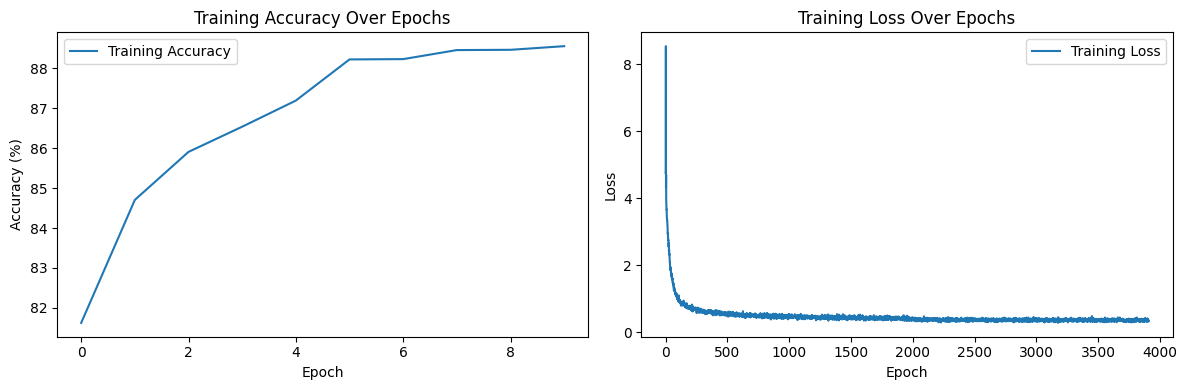

In [11]:
# Plotting training accuracies and losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
torch.save(model.state_dict(), f'../artifacts/cnn_ascii_classifier_{height}_x_{width}.pth')

In [13]:
# Reshape the images to [batch_size, 1, 10, 10]
test_images_tensor = test_images_tensor.view(-1, 1, height, width)

# Move the test data to the GPU
test_images_tensor, test_labels_tensor = test_images_tensor.to(device), test_labels_tensor.to(device)

# Create TensorDataset and DataLoader for the test data
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Evaluate the model on the test data
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs, _ = model(images)
        probabilities = F.softmax(outputs, dim=1)
        
        _, predicted = torch.max(probabilities, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.4f}%')

Test Accuracy: 96.0170%
